# Problem Staement: Convering text image into text


## Library / Technniue used : 
1. OpenCV
2. pytesseract (OCR-Optical Character Recognition)
3. cvtColor
4. Blurring : medianBlur,GaussianBlur
5. Thresholding:(Simple Thresholding, Adaptinve thresholding, Ostu's thresholding 
6. Morphological transformations ( dilate/erode),


In [107]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

# Function to plot multiple images

In [108]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image,caption in zip(axes, images, captions):
        ax.imshow(image, cmap)
        ax.set_title(caption)

In [109]:
# Here, we define some colours
SCALAR_BLACK = (0.0,0.0,0.0)
SCALAR_WHITE = (255.0,255.0,255.0)
SCALAR_YELLOW = (0.0,255.0,255.0)
SCALAR_GREEN = (0.0,255.0,0.0)
SCALAR_RED = (0.0,0.0,255.0)
SCALAR_CYAN = (255.0,255.0,0.0)

# Function to plot image with better aspect ratio

In [110]:
import matplotlib as mpl

def plotting(image, cmap = None):
    if cmap == 'gray':
        height, width = image.shape
    else:      
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width, depth = image.shape
        
    dpi = mpl.rcParams['figure.dpi']
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)

    # Display the image.
    plt.imshow(image, cmap)
    

In [111]:
# import the tesseract library
import pytesseract
# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd =r'C:\Program Files\Tesseract-OCR\tesseract'

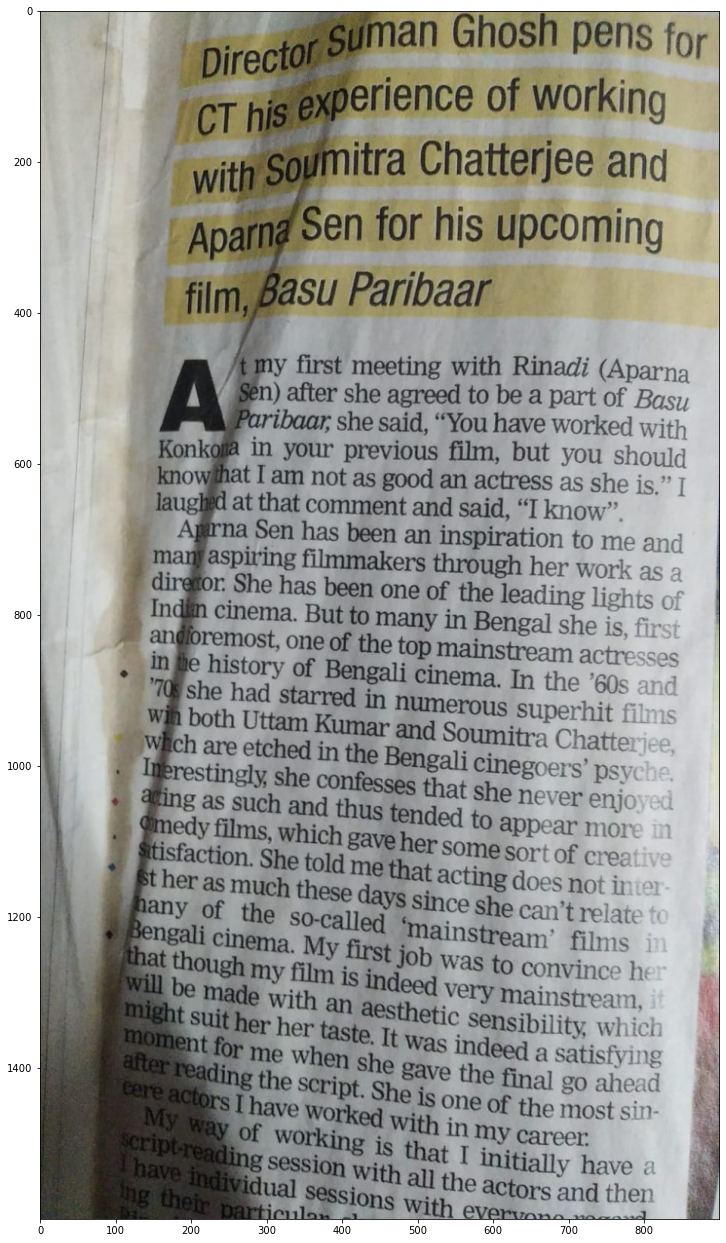

In [112]:
# Reading image
image = cv2.imread(r'C:\Users\ekrsinh\OneDrive - Ericsson\Documents\upgrad4\OvenCV\Newspaper.jpeg')
plotting(image)

In [113]:
#Extracting text using OCR
text = pytesseract.image_to_string(image)
print(text)

perience of working
itra Chatterjee and

aribaar, she said, “You have worked with

a in your previous film, but you should

wnat I am not as good an actress as she js,” |
laugigd at that comment and said, “I know”.

e
&
B
8

Save her some sort of cre:
me that acting does not i:
ese > Since she can’t relat:
Mainstream’ films
. My first oe Was to convince h

very mainstream,
an aesthetic Sensibility, whic :
PY ag » SNsibility, whic!

e Wo ne of the most sin
ao In My career.
of working wy C
ag session wiry | initially have «

€ actors and then
eve

- a ee |



### Now that we are not able to extract text from image, let's try to improve the result using some pre-processing 

## Pre-processing techniques
You can improve the result by some of the following pre-processing techniques:
1. Increasing resolution: Increase the resolution of image
2. Deskewing: Deskew the image. It also makes it easier to do more processing.
3. Blurring: It is useful for removing noise. 
3. Convert to Black and White: Convert the image into black and white after deskewing and resizing. It will produce consistent character size and thickness.  
4. Remove Noise: Remove noise from black and white image. Perform operations like morphological transformation, contours etc. to remove the noise. 
5. Train Tesseract on the Font

#### Converting to grayscale
Generally, we convert any colour image to grayscale for better perprocessing.

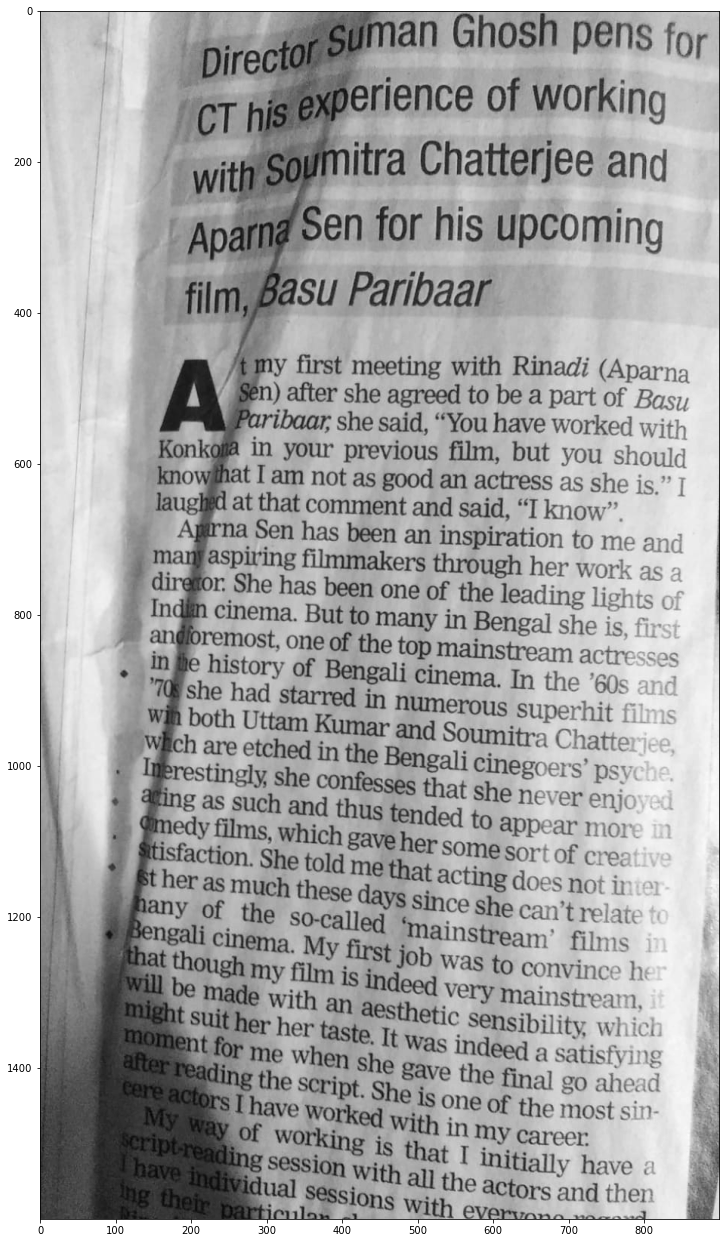

In [114]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plotting(gray, cmap = 'gray')

# Let's blur the image for smoothing.Smoothening is done to remove noise.

#### Gaussin blur. Gaussian Noise is modeled by adding random values to an image. Gaussian filter helps in removing Gaussian noise from the image

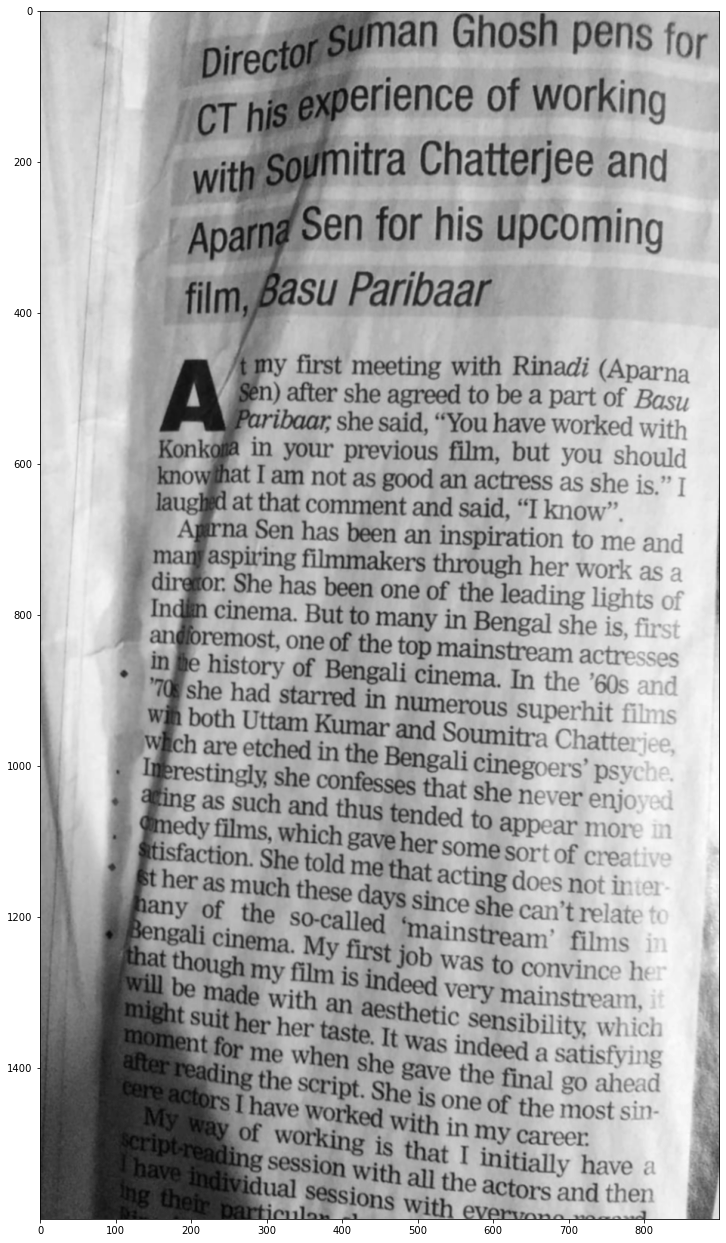

In [115]:
# Add some Gaussian Blur
gaussian = cv2.GaussianBlur(gray,(3,3),0) # The function convolves the source image with the specified Gaussian kernel(3,3).0 is standard deviation in the X and Y directions
plotting(gaussian, cmap = 'gray')

If we compare original image with gaussian blurred image, there is not much difference.

#### Median blur. Median Filter helps in removing salt-and-pepper noise.An image containing salt-and-pepper noise will have dark pixels in bright regions and bright pixels in dark regions.

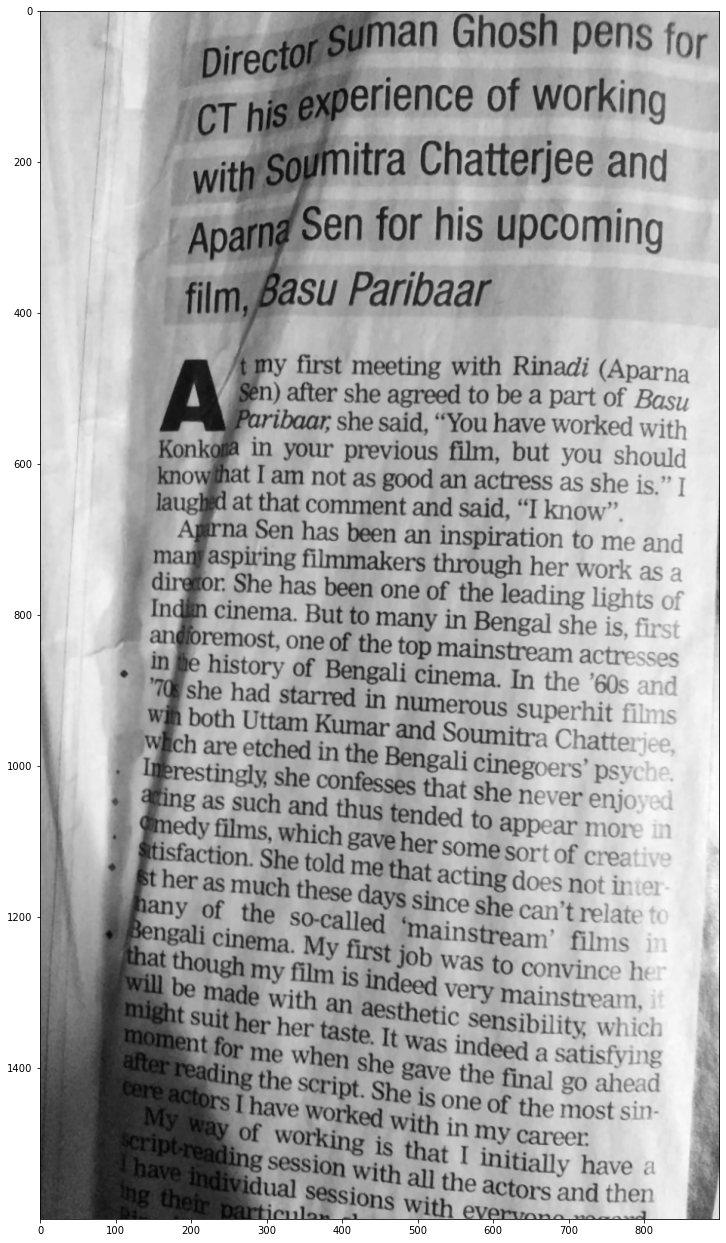

In [116]:
# Median Blur
median = cv2.medianBlur(gray,3) # kernel size = 3
plotting(median,cmap = 'gray')

Median blur is also not adding any vlaue in original image

#### Let's find the text output after bluring.Objective of blurring image is that if we apply pytesserect over blurred image, it should give better ouput.

In [117]:
text = pytesseract.image_to_string(gaussian)
print(text)

ibaar, she said, “You have worked with
gj@ in your previous film, but you should
what I am not as good an actress as she is.” I
laugigd at that comment and said, “I know”

Agrna Sen has been an inspiration to me an
lag aspiring filmmakers through her work as

history of Bengali cinema. In the ’60<
starred in numerous superhit

k and Soumitra Chatt:
hare etched in the Bengali cinegoers’ ps)

tended to appear mo)
8ave her some Sort of cre:
that acting does not i;
since She can’t relat
ainstream’ films
Was to convince h
Very mainstream,
etic Sensibility, whic!
indeed a Satisfying
the final go ahead
is ne of the most sin

.
my

a



In [118]:
text = pytesseract.image_to_string(median)
print(text)

man Ghosh pens for
rience of working
itra Chatterjee and

ibaar, she said, “You have worked with
in your previous film, but you should
hat I am not as good an actress as she is’ ]
d at that comment and said, “I know”
Agrna Sen has been an inspiration to me ant
aug aspiring filmmakers through her work as
ir@for. She has been one of the leading lights

cinema. But to Many in Bengal she is. f
bremost, one of the top Mainstream actresses
. ine history of Bengali cinema. In the ’60s

"70 she had in numerous superhit
W ‘pe ou ay and Soumitra Chatte
, are e In the Bengali cinegoers’ IS)
_ gz estingly she confesses that she 4 ver 4

3 since She can’t relat
Mainstream’ films

Was indeed a satisfy 1g
e the final go ahead
4,» Oe Of the most sin
th in my career:
that | initially havea &
the actors and the
th ev:

= ) z
| ee |



#### We can see that image with gaussina blur is improved .Let's do further preprocessing to improve further

# Thresholding the image: 
Idea of thresholding means choosing a threshold pixel value and make all other pixel which are less than the threshold to a certain pixel and pixel above threshold assign a certain pixel. 

Image after smothening gets blurred.Generally OCR works better with sharp images ie text boarders with high contrast.Binarization makes the image sharp.Also, it it reduces the size of the image which helps in preprossing in OCR. 

#### 1. Simple thresholding

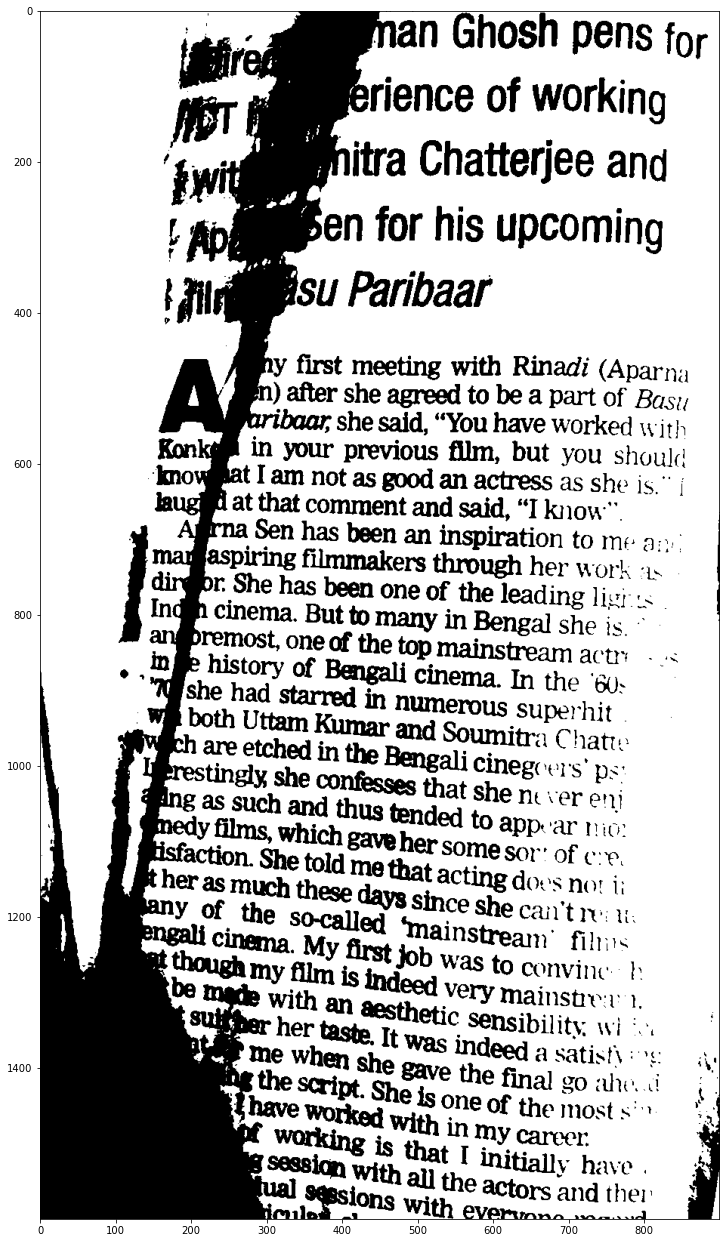

In [119]:
ret,simple_threshold = cv2.threshold(gaussian,127,255,cv2.THRESH_BINARY) #Everypixel>127 will be made to 255 and pixel les than 127 will be made to 0.
plotting(simple_threshold,cmap = 'gray')

We see that results are not encouraging and even it is poorer.

#### 2. Adaptinve thresholding

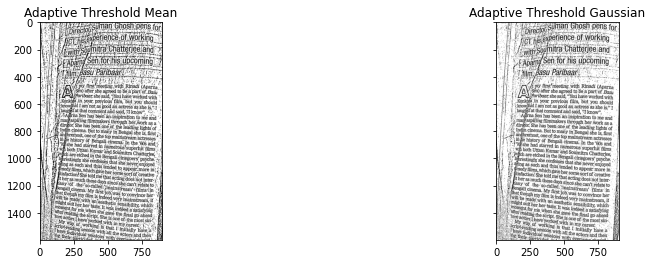

In [120]:
adaptive_threshold_mean= cv2.adaptiveThreshold(median , 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2) 
adaptive_threshold_gaussian = cv2.adaptiveThreshold(gaussian,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

plot_image([adaptive_threshold_mean, adaptive_threshold_gaussian], cmap = 'gray', captions = ["Adaptive Threshold Mean", "Adaptive Threshold Gaussian"])

We can ss that it performs at least better than simple tresholding.

#### 3. Ostu's thresholding

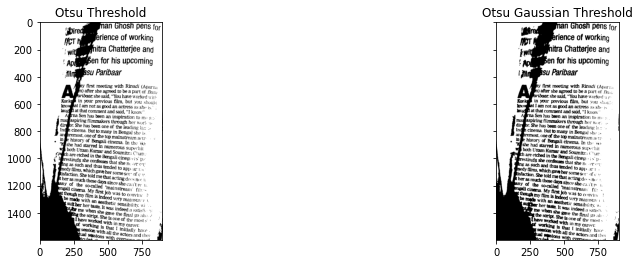

In [121]:
# Otsu's thresholding
ret2,otsu_threshold = cv2.threshold(median,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(median,(5,5),0)
ret3,otsu_gaussian_threshold = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plot_image([otsu_threshold, otsu_gaussian_threshold], cmap='gray', captions = ["Otsu Threshold", "Otsu Gaussian Threshold"])

We can see that Otsu's thresholding after Gaussian filtering is even giving poorer result.Botton right corner is completely blank

So, on comparing all three results, adaptive thresholding works better and we will use this result in our pipeline.

In [122]:
text = pytesseract.image_to_string(adaptive_threshold_gaussian)
print(text)

ni

“am ny aspit'ing filmin

diretor: She has be

|

ine
Ss




In [123]:
text = pytesseract.image_to_string(adaptive_threshold_mean)
print(text)

blade wet

We Cian as ¥ se 4 ith Rinadi (Ap aia

“if first 'mee ng Wi ma

7; Ap a She agreed to. be’ ‘a ‘part’ of, Basi a
\Poribaar she’ said; ‘ You have 2 worked With =
% Kank ,in, your. previous’ film,” but: -you’ should *
rkriowghat | Tam ‘not as good an actress as she & ade

‘at that ¢ comment: ‘ahd said, oT know”, taste

n ‘Sen’ has been: an:inspiration to mé aiid ‘
s.through’ hér,work asa.’

Of, the leading lights’ of .: :

fr cement ‘But to many in'Bengal : she is, first ‘he

history’ 6
Lye “7 she had ea ‘in

appear, ‘more int;: IN

her some: Sort of ¢ Creative .; Z.

The that 3 acting 'ddes' Hot inter:
aes sinté she’ can’t relate to “K
1 tmain nstream’ "+ filnis in | my

Ist job w, Was: to'c




## Observation : We observed that thresholding output is giving poor results as compared to results without thresholding. Gaussian output was at least better and we will go with this.

# Morphological transformations
In Morphological transforamtion, we change size of objects.Morphological transformations is normally performed on binary images. It needs two inputs, one is the image, other is structuring element or kernel which decides the nature of operation.

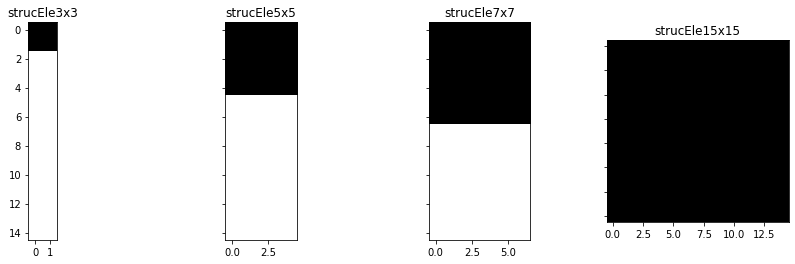

In [124]:
# Now, we define structuring elements

strucEle3x3 = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
strucEle5x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
strucEle7x7 = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))        
strucEle15x15 = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))

plot_image([strucEle3x3, strucEle5x5, strucEle7x7, strucEle15x15], cmap='gray', captions = ["strucEle3x3", "strucEle5x5", "strucEle7x7", "strucEle15x15"])

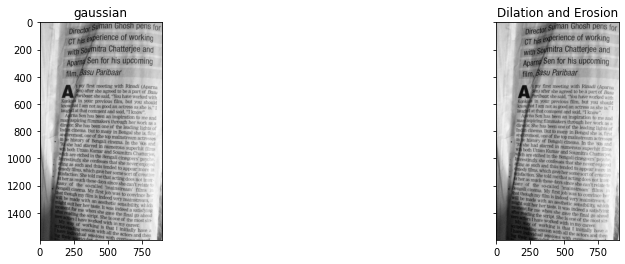

In [125]:
for i in range(2):
    imgThresh = cv2.dilate(gaussian,strucEle3x3,iterations = 2)
    imgThresh = cv2.erode(imgThresh,strucEle3x3,iterations = 2)

plot_image([gaussian, imgThresh], cmap='gray', captions = ["gaussian", "Dilation and Erosion"])            

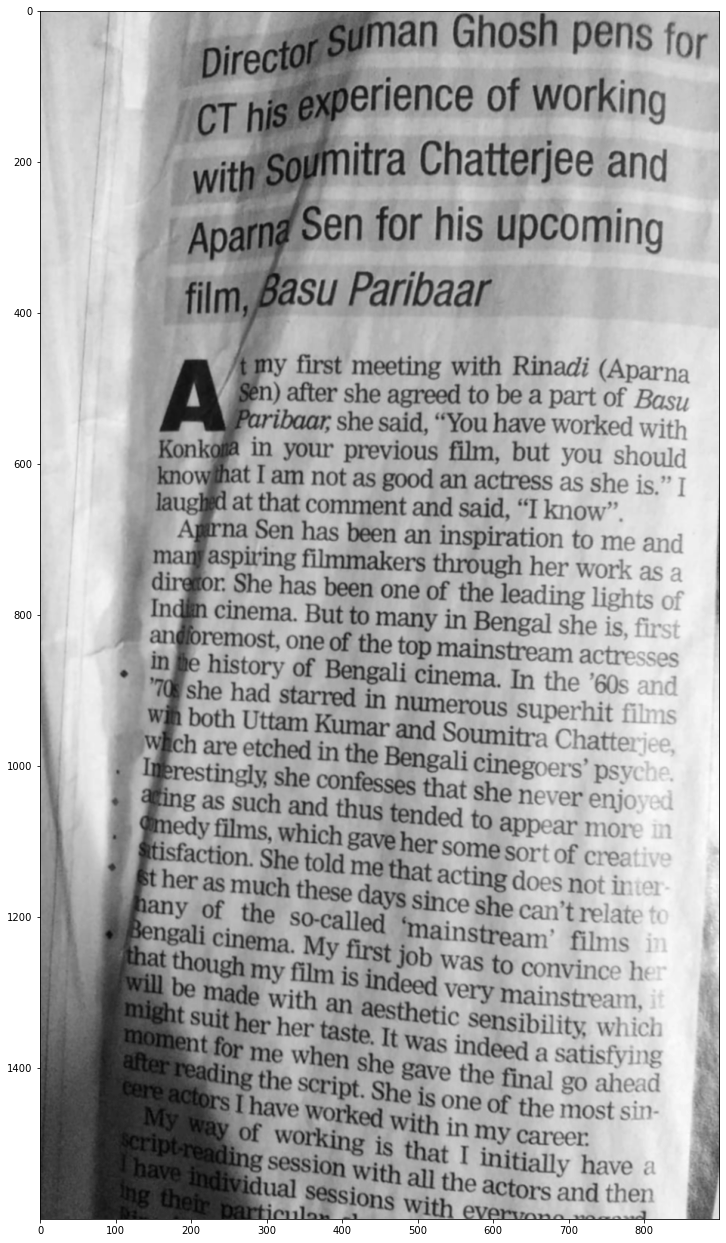

In [126]:
plotting(gaussian, cmap = 'gray')

In [127]:
text = pytesseract.image_to_string(imgThresh)
print(text)

in your previous film, but you s!

Jaugigd at that comment and said, “I know”
Agrna Sen has been an inspiration to 1

dirgfor: She has been one of the leading 1i
cinema. But to many in Bengal she i
bremost, one of the top mainstream actr
ny history of Bengali cinema. In the ’60:
she ha in numerous superhit
v@ both Uttam Kumar and Soumitra Chatt

her some sor of cre
that acting does ni
since she can't rela
jaainstream fil:

. b was to convi (
my film is it convin

aesthetic S€Nsibility, w!

y first meeting with Rinadi (Ap:
n) after she agreed to be a part of Ba
aribaar, she said, “You have worked w jt

very mainstream,

ll the actors and the
th ee

arna

it Tam not as good an actress as she is

Mmaygaspiring filmmakers through her wor



# Comment : We observed that results of pytesseract is on gaussian output is better as compared to results on thresholding.